<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [56]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib.category import UnitData

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
#The following describes the dataset variables:

#·      CRIM - per capita crime rate by town

#·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

#·      INDUS - proportion of non-retail business acres per town.

#·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

#·      NOX - nitric oxides concentration (parts per 10 million)

#·      RM - average number of rooms per dwelling

#·      AGE - proportion of owner-occupied units built prior to 1940

#·      DIS - weighted distances to five Boston employment centres

#·      RAD - index of accessibility to radial highways

#·      TAX - full-value property-tax rate per $10,000

#·      PTRATIO - pupil-teacher ratio by town

#·      LSTAT - % lower status of the population

#·      MEDV - Median value of owner-occupied homes in $1000's


boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 0, 'Owner-Occupiers')

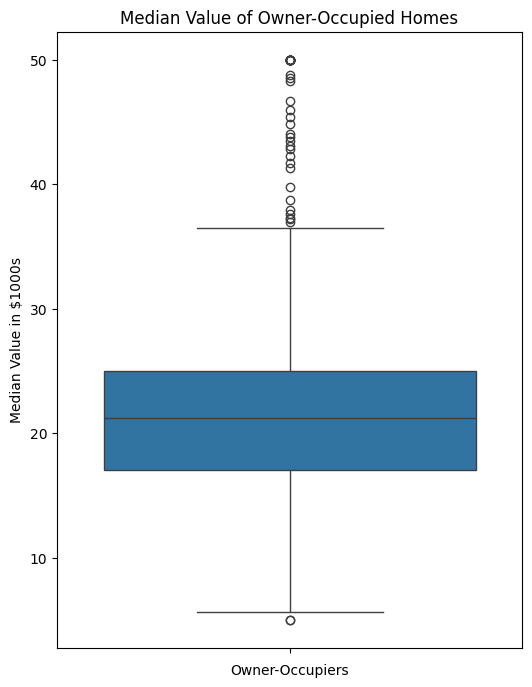

In [73]:
plt.figure(figsize=(6,8))
x1 = sns.boxplot(y='MEDV', data=boston_df)
x1.set_title('Median Value of Owner-Occupied Homes')
x1.set_ylabel('Median Value in $1000s')
x1.set_xlabel('Owner-Occupiers')

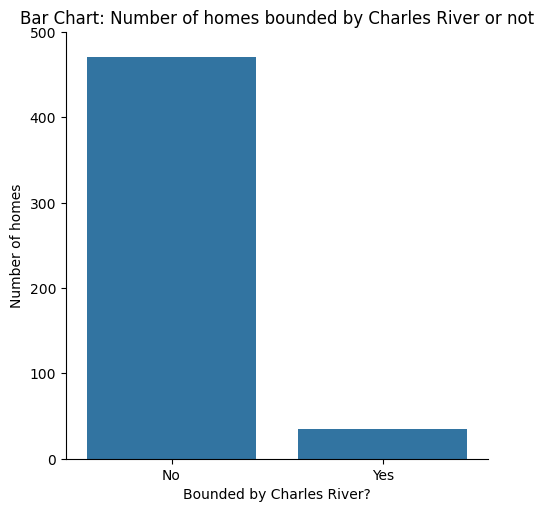

In [81]:
x2 = sns.catplot(x='CHAS',kind='count', data=boston_df)
plt.title('Bar Chart: Number of homes bounded by Charles River or not')
plt.xlabel('Bounded by Charles River?')
plt.ylabel('Number of homes')
x2.set_xticklabels(['No', 'Yes'])
plt.ylim(0,500)
plt.show()

In [61]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

b_order=['35 years and younger', 'between 35 and 70 years', '70 years and older']

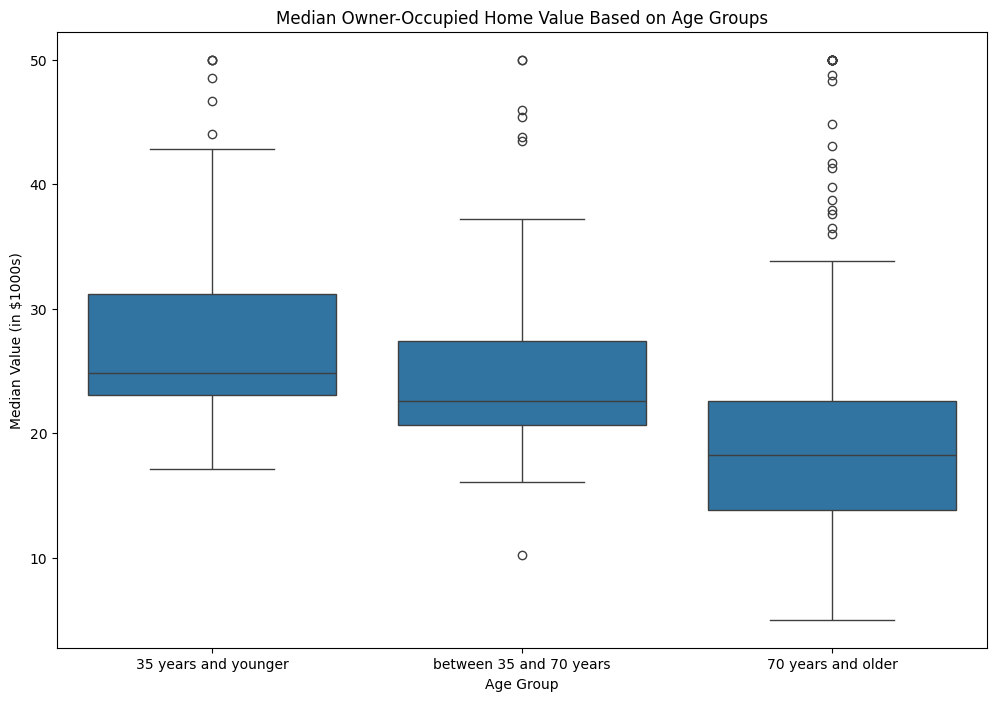

In [75]:
plt.figure(figsize=(12,8))
x3=sns.boxplot(x='age_group', y='MEDV', data=boston_df, order=b_order)
plt.title('Median Owner-Occupied Home Value Based on Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

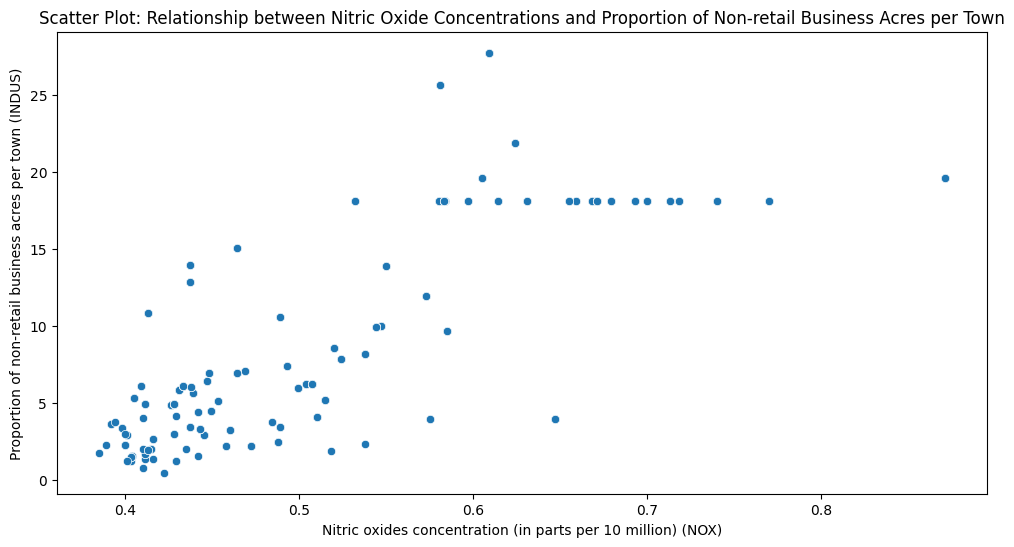

In [77]:
plt.figure(figsize=(12,6))
x4 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot: Relationship between Nitric Oxide Concentrations and Proportion of Non-retail Business Acres per Town')
plt.xlabel('Nitric oxides concentration (in parts per 10 million) (NOX)')
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')
plt.show()

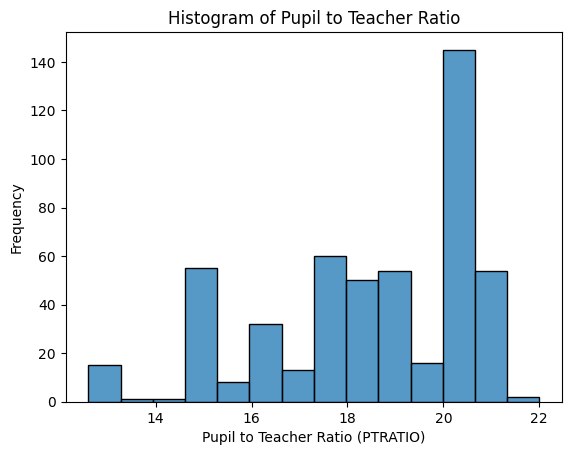

In [80]:
x5 = sns.histplot(data=boston_df,x='PTRATIO')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.show()

## Question: Is there a significant difference in median value of houses bounded by the Charles river or not?
### H1 (hypothesis): There is a significant difference between median house values depending on whether they are bounded by the Charles river or not.
### H0 (null): There is no difference in median house prices depending on Charles River location.

#### Alpha = 0.05



In [91]:
stat,p_val=scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'],equal_var=False)
print(f"\nT-test result:", stat, "\np-value is", round(p_val,4), "therefore we reject the null hypothesis.")


T-test result: -3.113291312794837 
p-value is 0.0036 therefore we reject the null hypothesis.


#

## Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
### H1: For each proportion of units built before 1940, there is a difference in the median value of houses.
### H0: There is no difference in median vaule of houses in each age group regardless of when built.
#### Alpha = 0.05

In [116]:
low_group=boston_df.loc[(boston_df['age_group']=='35 and less')]['MEDV']
middle_group=boston_df.loc[(boston_df['age_group']=='36 to 70')]['MEDV']
top_group=boston_df.loc[(boston_df['age_group']=='70 and above')]['MEDV']

f_stat,f_pval=scipy.stats.f_oneway(low_group,middle_group,top_group)
#pvalue=1.7105011022702984e-15 - we reject the null hypothesis, the means of the groups are not the same
print(f"p-value is 1.7105011022702984e-15, we reject the null hypothesis.")

p-value is 1.7105011022702984e-15, we reject the null hypothesis.


#

## Question: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

### Hypothesis: There is a relationship between NOX and INDUS.
### H0: There is no relationship between NOX and INDUS.

#### Alpha = 0.05

In [104]:
p_stat,p_pval=scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print(f"\nPearson correlation result = {round(p_stat,3)}, pvalue = {p_pval}. \nWe reject the null hypothesis- there is strong positive correlation between the 2 variables")


Pearson correlation result = 0.764, pvalue = 7.913361061210442e-98. 
We reject the null hypothesis- there is strong positive correlation between the 2 variables


#

## Question: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 
### Hyp: Median value of homes is significantly different depending on weighted distance from employment centres.
### H0: There is no difference in median home values depending on distance to employment centres.
#### Alpha = 0.05

In [112]:
x=boston_df['DIS'] #Independent variable
y=boston_df['MEDV'] #Dependent variable

x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)

print(model.summary())

print("\nWe reject the null hypothesis, p-value = 0.000")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        15:20:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0